**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Milestone_1

`Imam Ahfas - FTDS Batch 12`

## Description

### Objective

Kamu adalah seorang Data Analyst yang akan mengerjakan projek besar untuk menyelesaikan suatu permasalahan client dan client kamu butuh sekali hasil analisa datamu menggunakan statistik dan dashboard visualisasi data untuk membantu mereka menyelesaikan masalah

### Problem Statement

CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Sebagai Data Scientist diminta untuk mengungkapkan apakah ada masalah atau tidak dari sistem penjualan di platformnya Menggunakan dataset thelook_ecommerce di Google Cloud Platform BigQuery.

Adanya masalah atau tidak pada sistem penjualan bisa kita lihat dari bagaimana proses pengiriman sampai pembeli dari distribution center dan seberapa banyak produk yang terjual dan canceled, dan bagaimana performa penjualan Thelook_ecommerce pun bisa terlihat,
berikut penjabaran dari kasus thelook_ecommerce:

## What
1. Apakah penjualan dari Thelook_ecommerce menguntungkan ?  
2. Category Produk apa yang paling banyak dan sedikit pembeliannya ? 

## Where
3. Dimana pembelian terbanyak dan sedikit terjadi ?

## Who
4. Siapa yang paling banyak membeli produk, Female or Male ? 

## How
5. berapa lama rata-rata proses pengiriman dari produk sampai ke buyer ? 
6. berapa loss profit yang diakibatkan oleh error(jika ada), produk yang dibatalkan, dan juga produk yang di returned atau dikembalikan ?
7. Berapa central tendency profit pembelian Male dan Female ?
8. Perhitungan Deskriptif Statistik dan Inferential Statistik dari rata-rata profit pembelian dari Male

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

## Data Loading & Queries

Import Library

In [349]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Loading Data Query

In [130]:
df = pd.read_csv('h8dsft_P0ML1_Imam_Ahfas.csv', parse_dates=['created_at', 'shipped_at', 'delivered_at','returned_at']) 

Query Code in Google Cloud Platform

- SELECT S.first_name, S.age, S.gender, PRO.name, 
PRO.brand, PRO.category, PRO.cost, PRO.retail_price,
OI.status, OI.created_at, OI.shipped_at, DC.name,
OI.delivered_at, S.city, OI.returned_at,
- FROM `bigquery-public-data.thelook_ecommerce.products` AS PRO
- JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS OI ON
OI.product_id = PRO.id
- JOIN `bigquery-public-data.thelook_ecommerce.users` AS S ON
OI.user_id = S.id
- JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS II ON
OI.inventory_item_id = II.id
- JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` AS DC ON
II.product_distribution_center_id = DC.id
- WHERE
OI.created_at BETWEEN '2022-01-01' AND '2022-12-30'

Data diambil dengan range waktu di antara '2022-01-01' AND '2022-12-30', agar dapat melihat anomali jika ada dengan data terupdate agar sistem dapat segera diperbaharui kedepannya.

Loading dilakukan dengan merubah format menjadi waktu dari proses:
- order dibuat atau created_at, 
- order dikirim atau shipped_at,
- order diterima atau delivered_at,
- order dikembalikan atau returned_at.

Nama Kolom dilakukan perubahan agar memudahkan dalam analisa

In [131]:
df = df.rename(columns={'name_1' : 'dist_center'})
df = df.rename(columns={'name' : 'product_name'})
df = df.rename(columns={'first_name' : 'username'})

In [132]:
df.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,returned_at
0,Cassandra,23,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-01 05:18:44+00:00,2022-03-01 20:48:00+00:00,Houston TX,NaT,Fortaleza,NaT
1,Danielle,41,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-29 21:37:06+00:00,2022-03-30 12:41:00+00:00,Houston TX,NaT,Chelmsford,NaT


Untuk melakukan analisa distribusi membuat dataframe baru yang berisikan,
- df = dimana status pembelian dan pengiriman completed diselesaikan
- df_returned = dimana statu pembelian dikembalikan
- df_canceled = dimana suatau pembelian digagalkan

## Data Cleaning

### Data penjualan dengan status complete atau diselesaikan

In [133]:
df.isnull().sum()

username            0
age                 0
gender              0
product_name        6
brand              51
category            0
cost                0
retail_price        0
status              0
created_at          0
shipped_at      25976
dist_center         0
delivered_at    47892
city              748
returned_at     65972
dtype: int64

Menambahkan kolom profit untuk analisa sales penjualan

In [134]:
df['profit'] = df['retail_price'] - df['cost']
df.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,returned_at,profit
0,Cassandra,23,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-01 05:18:44+00:00,2022-03-01 20:48:00+00:00,Houston TX,NaT,Fortaleza,NaT,1.3925
1,Danielle,41,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-29 21:37:06+00:00,2022-03-30 12:41:00+00:00,Houston TX,NaT,Chelmsford,NaT,1.3925


Menghilangkan missing value agar memudahkan analisa penjualan

### Data penjualan product yang return atau dikembalikan kepada penjual

In [140]:
df_returned = df.copy()

In [136]:
df_returned.isnull().sum()

username            0
age                 0
gender              0
product_name        6
brand              51
category            0
cost                0
retail_price        0
status              0
created_at          0
shipped_at      25976
dist_center         0
delivered_at    47892
city              748
returned_at     65972
profit              0
dtype: int64

Data atau missing value pada returned_at dan lainnya di drop agar mendapatkan nilai returned yang sepenuhnya ada

In [143]:
df_returned.dropna(inplace=True)

In [144]:
df_returned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7054 entries, 19 to 73107
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   username      7054 non-null   object             
 1   age           7054 non-null   int64              
 2   gender        7054 non-null   object             
 3   product_name  7054 non-null   object             
 4   brand         7054 non-null   object             
 5   category      7054 non-null   object             
 6   cost          7054 non-null   float64            
 7   retail_price  7054 non-null   float64            
 8   status        7054 non-null   object             
 9   created_at    7054 non-null   datetime64[ns, UTC]
 10  shipped_at    7054 non-null   datetime64[ns, UTC]
 11  dist_center   7054 non-null   object             
 12  delivered_at  7054 non-null   datetime64[ns, UTC]
 13  city          7054 non-null   object             
 14  return

Semua missing value sudah tidak ada

In [145]:
df_returned.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,returned_at,profit
19,Eric,40,M,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Accessories,1.5225,3.5,Returned,2022-06-06 18:23:27+00:00,2022-06-08 22:25:00+00:00,Houston TX,2022-06-10 05:34:00+00:00,Harbin,2022-06-12 02:05:00+00:00,1.9775
20,William,58,M,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Accessories,1.5225,3.5,Returned,2022-04-22 01:33:33+00:00,2022-04-18 07:14:00+00:00,Houston TX,2022-04-21 16:09:00+00:00,Cardiff,2022-04-21 17:14:00+00:00,1.9775


Merubah format menjadi tahun-bulan-tanggal untuk memudahkan analisa

In [146]:
df_returned['created_at']=pd.to_datetime(df_returned['created_at'].dt.strftime('%Y-%m-%d'))
df_returned['shipped_at']=pd.to_datetime(df_returned['shipped_at'].dt.strftime('%Y-%m-%d'))
df_returned['delivered_at']=pd.to_datetime(df_returned['delivered_at'].dt.strftime('%Y-%m-%d'))
df_returned['returned_at']=pd.to_datetime(df_returned['returned_at'].dt.strftime('%Y-%m-%d'))

In [147]:
df_returned.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,returned_at,profit
19,Eric,40,M,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Accessories,1.5225,3.5,Returned,2022-06-06,2022-06-08,Houston TX,2022-06-10,Harbin,2022-06-12,1.9775
20,William,58,M,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Accessories,1.5225,3.5,Returned,2022-04-22,2022-04-18,Houston TX,2022-04-21,Cardiff,2022-04-21,1.9775


Dikarenakan produk di kembalikan maka profit menjadi loss profit


In [149]:
df_returned = df_returned.rename(columns={'profit' : 'loss_profit'})
df_returned.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,returned_at,loss_profit
19,Eric,40,M,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Accessories,1.5225,3.5,Returned,2022-06-06,2022-06-08,Houston TX,2022-06-10,Harbin,2022-06-12,1.9775
20,William,58,M,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Accessories,1.5225,3.5,Returned,2022-04-22,2022-04-18,Houston TX,2022-04-21,Cardiff,2022-04-21,1.9775


In [148]:
df_returned.shape

(7054, 16)

### Data penjualan product yang canceled atau digagalkan oleh pembeli

In [150]:
df_canceled = df.copy()

In [151]:
df_canceled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73110 entries, 0 to 73109
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   username      73110 non-null  object             
 1   age           73110 non-null  int64              
 2   gender        73110 non-null  object             
 3   product_name  73104 non-null  object             
 4   brand         73059 non-null  object             
 5   category      73110 non-null  object             
 6   cost          73110 non-null  float64            
 7   retail_price  73110 non-null  float64            
 8   status        73110 non-null  object             
 9   created_at    73110 non-null  datetime64[ns, UTC]
 10  shipped_at    47134 non-null  datetime64[ns, UTC]
 11  dist_center   73110 non-null  object             
 12  delivered_at  25218 non-null  datetime64[ns, UTC]
 13  city          72362 non-null  object             
 14  return

Analisa dilakukan dengan drop kolom pengiriman, diterima dan dikembalikan, agar status canceled dapat di analisa

In [152]:
df_canceled.drop(['shipped_at','delivered_at', 'returned_at'], axis=1, inplace=True)

In [153]:
df_canceled.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,dist_center,city,profit
0,Cassandra,23,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-01 05:18:44+00:00,Houston TX,Fortaleza,1.3925
1,Danielle,41,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-29 21:37:06+00:00,Houston TX,Chelmsford,1.3925


In [154]:
df_canceled.dropna(inplace=True)

In [155]:
df_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72305 entries, 0 to 73109
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   username      72305 non-null  object             
 1   age           72305 non-null  int64              
 2   gender        72305 non-null  object             
 3   product_name  72305 non-null  object             
 4   brand         72305 non-null  object             
 5   category      72305 non-null  object             
 6   cost          72305 non-null  float64            
 7   retail_price  72305 non-null  float64            
 8   status        72305 non-null  object             
 9   created_at    72305 non-null  datetime64[ns, UTC]
 10  dist_center   72305 non-null  object             
 11  city          72305 non-null  object             
 12  profit        72305 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(8)
me

semua missing value sudah tidak ada

In [156]:
df_canceled.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,dist_center,city,profit
0,Cassandra,23,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-01 05:18:44+00:00,Houston TX,Fortaleza,1.3925
1,Danielle,41,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-29 21:37:06+00:00,Houston TX,Chelmsford,1.3925


Merubah format tahun-bulan-tanggal agar memudahkan analisa

In [157]:
df_canceled['created_at']=pd.to_datetime(df_canceled['created_at'].dt.strftime('%Y-%m-%d'))

In [158]:
df_canceled.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,dist_center,city,profit
0,Cassandra,23,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-01,Houston TX,Fortaleza,1.3925
1,Danielle,41,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-29,Houston TX,Chelmsford,1.3925


Dikarenakan produk dibatalkan maka profit menjadi loss profit

In [159]:
df_canceled = df_canceled.rename(columns={'profit' : 'loss_profit'})
df_canceled.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,dist_center,city,loss_profit
0,Cassandra,23,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-01,Houston TX,Fortaleza,1.3925
1,Danielle,41,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Shipped,2022-03-29,Houston TX,Chelmsford,1.3925


## Analisis dan Perhitungan

### Analisa Data penjualan dengan status Complete atau Diselesaikan

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73110 entries, 0 to 73109
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   username      73110 non-null  object             
 1   age           73110 non-null  int64              
 2   gender        73110 non-null  object             
 3   product_name  73104 non-null  object             
 4   brand         73059 non-null  object             
 5   category      73110 non-null  object             
 6   cost          73110 non-null  float64            
 7   retail_price  73110 non-null  float64            
 8   status        73110 non-null  object             
 9   created_at    73110 non-null  datetime64[ns, UTC]
 10  shipped_at    47134 non-null  datetime64[ns, UTC]
 11  dist_center   73110 non-null  object             
 12  delivered_at  25218 non-null  datetime64[ns, UTC]
 13  city          72362 non-null  object             
 14  return

Kolom returned dihilangkan karena tidak digunakan dalam analisa

In [ ]:
df.drop(['returned_at'], axis=1, inplace=True)

In [171]:
df.isnull().sum()

username            0
age                 0
gender              0
product_name        6
brand              51
category            0
cost                0
retail_price        0
status              0
created_at          0
shipped_at      25976
dist_center         0
delivered_at    47892
city              748
profit              0
dtype: int64

Menghilangkan missing value dengan delete baris karena yang dibutuhkan dalam analisa kali ini adalah yang statusnya complete

In [172]:
df.dropna(inplace=True)

In [174]:
df.shape

(24909, 15)

Merubah format waktu menjadi tahun-tanggal-bulan untuk memudahkan analisa

In [175]:
df['created_at']=pd.to_datetime(df['created_at'].dt.strftime('%Y-%m-%d'))
df['shipped_at']=pd.to_datetime(df['shipped_at'].dt.strftime('%Y-%m-%d'))
df['delivered_at']=pd.to_datetime(df['delivered_at'].dt.strftime('%Y-%m-%d'))

In [176]:
df.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,profit
2,Brandi,53,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-02-17,2022-02-20,Houston TX,2022-02-23,Honghe Hani Dai Autonomous Prefecture,1.3925
3,Mary,64,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-01-16,2022-01-17,Houston TX,2022-01-21,Changsha,1.3925


In [177]:
df_profit = df[df['status']=='Complete']
df_profit.describe()

,age,cost,retail_price,profit
count,17855.000000,17855.000000,17855.000000,17855.000000
mean,40.936152,28.647745,59.396660,30.748916
std,17.034920,30.211722,64.973418,35.790509
min,12.000000,0.008300,0.020000,0.011700
25%,26.000000,11.375500,24.450001,11.704500
50%,41.000000,19.915000,39.990002,20.230000
75%,56.000000,34.632000,69.500000,35.558649
max,70.000000,537.285001,999.000000,594.404999


In [411]:
df_profit.groupby(['status'])['cost','retail_price', 'profit'].sum()

C:\Users\581944~1.GMF\AppData\Local\Temp/ipykernel_15320/393907351.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_profit.groupby(['status'])['cost','retail_price', 'profit'].sum()


,cost,retail_price,profit
status,,,
Complete,511505.483556,1.060527e+06,549021.887338


<b> 1. Apakah penjualan dari Thelook_ecommerce menguntungkan ?

Jawab :
Penjualan Thelook_ecommerce menguntungkan dengan nilai profit total sebesar 549021.8873376349 dan nilai maximum profitnya berada di 594.404999.

In [415]:
a = df_profit.groupby(['status'])['cost','retail_price', 'profit'].sum().T
a

C:\Users\581944~1.GMF\AppData\Local\Temp/ipykernel_15320/1794891256.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df_profit.groupby(['status'])['cost','retail_price', 'profit'].sum().T


status,Complete
cost,5.115055e+05
retail_price,1.060527e+06
profit,5.490219e+05


C:\Users\581944~1.GMF\AppData\Local\Temp/ipykernel_15320/357643027.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


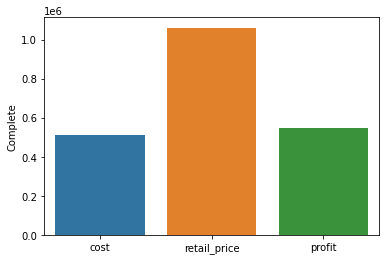

In [444]:
fig, ax = plt.subplots()
sns.barplot(data = a, x = a.index, y = 'Complete', ax = ax)
fig.show()

Dapat dilihat bahwa, profit diatas dari cost, thelook_ecommerce mempunyai penjualan yang menguntungkan

In [198]:
df[df['status']=='Complete']['category'].value_counts()

Intimates                        1315
Jeans                            1278
Tops & Tees                      1208
Fashion Hoodies & Sweatshirts    1174
Swim                             1119
Sweaters                         1102
Shorts                           1078
Sleep & Lounge                   1054
Accessories                       965
Active                            878
Outerwear & Coats                 830
Underwear                         753
Socks                             668
Pants                             644
Dresses                           555
Maternity                         534
Suits & Sport Coats               493
Pants & Capris                    392
Plus                              380
Socks & Hosiery                   354
Blazers & Jackets                 323
Leggings                          290
Skirts                            222
Suits                             115
Jumpsuits & Rompers               101
Clothing Sets                      30
Name: catego

<b> 2. Category produk apa yang paling banyak dan sedikit pembeliannya ?

Jawab : 
Category produk yang paling banyak pembeliannya adalah Intimates sebanyak 1315 dan paling sedikit adalah Clothing Sets sebanya 30

In [448]:
d = df[df['status']=='Complete']['category'].value_counts()
dx = pd.DataFrame(d)
dx

,category
Intimates,1315
Jeans,1278
Tops & Tees,1208
Fashion Hoodies & Sweatshirts,1174
Swim,1119
Sweaters,1102
Shorts,1078
Sleep & Lounge,1054
Accessories,965
Active,878


C:\Users\581944~1.GMF\AppData\Local\Temp/ipykernel_15320/3466479080.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


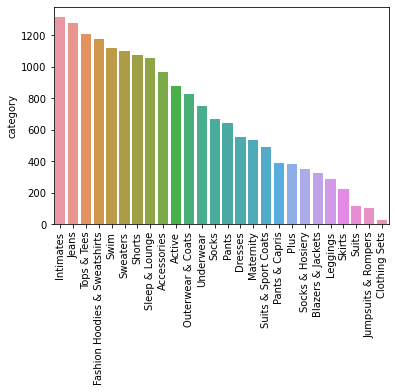

In [451]:
fig4, ax4 = plt.subplots()
sns.barplot(data = dx, x = dx.index, y = 'category', ax = ax4)
plt.xticks(rotation=90)
fig4.show()

Terlihat bahwa data Intimates terbesar

In [201]:
df[df['status']=='Complete']['city'].value_counts().head()

Shanghai    427
Beijing     337
Seoul       280
Shenzhen    248
Dongguan    169
Name: city, dtype: int64

In [209]:
df[df['status']=='Complete']['city'].value_counts().tail()

Exmouth      1
Sopelana     1
Panambi      1
La Algaba    1
Brakel       1
Name: city, dtype: int64

<b> 3. Dimana pembelian terbanyak dan sedikit terjadi ?

Jawab : Pembelian terbanyak terjadi di Shanghai sebanyak 427 dan yang sedikit sebanyak 1 salah satunya adalah di Brakel

In [429]:
b = df[df['status']=='Complete']['city'].value_counts().head().T
bc = pd.DataFrame(b)

C:\Users\581944~1.GMF\AppData\Local\Temp/ipykernel_15320/476243090.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


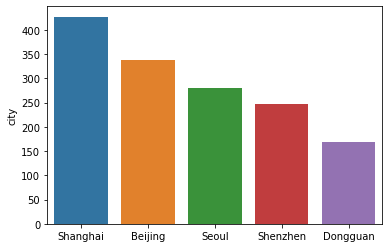

In [431]:
fig2, ax2 = plt.subplots()
sns.barplot(data = bc, x = bc.index, y = b , ax = ax2)
fig2.show()

In [219]:
df[df['status']=='Complete']['gender'].value_counts().head()

F    8944
M    8911
Name: gender, dtype: int64

In [221]:
df[df['status']=='Complete']['gender'].count()

17855

Nilai dalam percentage

In [222]:
F_percent = 8944/17855 * 100  
F_percent

50.092411089330724

In [215]:
df[df['gender']=='M']['category'].value_counts().head()

Jeans          1090
Tops & Tees    1072
Underwear      1070
Sweaters        971
Pants           949
Name: category, dtype: int64

In [216]:
df[df['gender']=='F']['category'].value_counts().head()


Intimates                        1842
Dresses                           756
Fashion Hoodies & Sweatshirts     726
Maternity                         714
Swim                              691
Name: category, dtype: int64

<b> 4. Siapa yang paling banyak membeli produk, Female or Male ?

Jawab :
Produk paling banyak dibeli oleh gender Female, yaitu sebanyak 8944 dari 17855 atau 50.092411089330724 persen

In [440]:
c = df[df['status']=='Complete']['gender'].value_counts().head().T
cx = pd.DataFrame(c)
cx

,gender
F,8944
M,8911


C:\Users\581944~1.GMF\AppData\Local\Temp/ipykernel_15320/3302734629.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


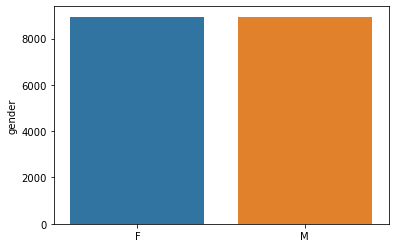

In [439]:
fig3, ax3 = plt.subplots()
sns.barplot(data = cx, x = cx.index, y = c , ax = ax3)
fig3.show()

Terlihat bahwa Female lebih besar dibandingkan Male

In [225]:
df.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,profit
2,Brandi,53,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-02-17,2022-02-20,Houston TX,2022-02-23,Honghe Hani Dai Autonomous Prefecture,1.3925
3,Mary,64,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-01-16,2022-01-17,Houston TX,2022-01-21,Changsha,1.3925


In [226]:
df['Arrival_time'] = df['delivered_at'] - df['shipped_at']
df['Arrival_time']

2       3 days
3       4 days
5       2 days
6       3 days
7       2 days
         ...  
73098   1 days
73104   4 days
73105   1 days
73106   4 days
73107   1 days
Name: Arrival_time, Length: 24909, dtype: timedelta64[ns]

In [229]:
df['Package_time'] = df['shipped_at'] - df['created_at']
df['Package_time']

2        3 days
3        1 days
5        1 days
6        0 days
7       -3 days
          ...  
73098    1 days
73104   -1 days
73105    0 days
73106    0 days
73107    1 days
Name: Package_time, Length: 24909, dtype: timedelta64[ns]

In [230]:
df.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,profit,Arrival_time,Package_time
2,Brandi,53,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-02-17,2022-02-20,Houston TX,2022-02-23,Honghe Hani Dai Autonomous Prefecture,1.3925,3 days,3 days
3,Mary,64,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-01-16,2022-01-17,Houston TX,2022-01-21,Changsha,1.3925,4 days,1 days


In [231]:
df['Total_shipment'] = df['delivered_at'] - df['created_at']
df['Total_shipment']

2        6 days
3        5 days
5        3 days
6        3 days
7       -1 days
          ...  
73098    2 days
73104    3 days
73105    1 days
73106    4 days
73107    2 days
Name: Total_shipment, Length: 24909, dtype: timedelta64[ns]

In [232]:
df.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,profit,Arrival_time,Package_time,Total_shipment
2,Brandi,53,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-02-17,2022-02-20,Houston TX,2022-02-23,Honghe Hani Dai Autonomous Prefecture,1.3925,3 days,3 days,6 days
3,Mary,64,F,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Accessories,1.1075,2.5,Complete,2022-01-16,2022-01-17,Houston TX,2022-01-21,Changsha,1.3925,4 days,1 days,5 days


In [241]:
df.groupby('city')['Total_shipment'].describe().T

city,Aachen,Abaetetuba,Abbots Bromley,Aberdare,Aberdeen,Abingdon,Acaraú,Accrington,Achern,Achim,...,Águas Belas,Águas Lindas de Goiás,Éibar,Élancourt,Épinay-sur-Seine,Évreux,Évry-Courcouronnes,Żagań,呉 市,大连市
count,5,9,1,2,5,4,3,1,4,1,...,2,17,7,3,1,6,5,8,2,2
mean,2 days 14:24:00,3 days 16:00:00,4 days 00:00:00,1 days 12:00:00,4 days 09:36:00,2 days 00:00:00,4 days 08:00:00,4 days 00:00:00,3 days 18:00:00,7 days 00:00:00,...,5 days 00:00:00,3 days 05:38:49.411764705,3 days 00:00:00,1 days 16:00:00,3 days 00:00:00,0 days 16:00:00,3 days 00:00:00,2 days 12:00:00,1 days 12:00:00,6 days 12:00:00
std,2 days 16:50:39.945167916,2 days 05:39:56.273255981,NaT,0 days 16:58:14.025894517,1 days 03:21:51.156728565,3 days 11:08:18.379547902,2 days 12:23:55.231735797,NaT,2 days 15:07:08.167268056,NaT,...,0 days 00:00:00,2 days 04:40:11.615429757,2 days 03:50:45.332114146,2 days 01:57:35.942353873,NaT,1 days 15:11:30.609184311,2 days 15:29:52.913275980,2 days 01:41:04.992981538,0 days 16:58:14.025894517,2 days 02:54:42.077683553
min,0 days 00:00:00,0 days 00:00:00,4 days 00:00:00,1 days 00:00:00,3 days 00:00:00,-1 days +00:00:00,2 days 00:00:00,4 days 00:00:00,1 days 00:00:00,7 days 00:00:00,...,5 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3 days 00:00:00,-1 days +00:00:00,0 days 00:00:00,-2 days +00:00:00,1 days 00:00:00,5 days 00:00:00
25%,1 days 00:00:00,3 days 00:00:00,4 days 00:00:00,1 days 06:00:00,4 days 00:00:00,-1 days +00:00:00,3 days 00:00:00,4 days 00:00:00,1 days 18:00:00,7 days 00:00:00,...,5 days 00:00:00,1 days 00:00:00,1 days 12:00:00,0 days 12:00:00,3 days 00:00:00,-1 days +06:00:00,2 days 00:00:00,2 days 00:00:00,1 days 06:00:00,5 days 18:00:00
50%,2 days 00:00:00,3 days 00:00:00,4 days 00:00:00,1 days 12:00:00,4 days 00:00:00,2 days 00:00:00,4 days 00:00:00,4 days 00:00:00,4 days 00:00:00,7 days 00:00:00,...,5 days 00:00:00,4 days 00:00:00,3 days 00:00:00,1 days 00:00:00,3 days 00:00:00,0 days 12:00:00,2 days 00:00:00,3 days 00:00:00,1 days 12:00:00,6 days 12:00:00
75%,3 days 00:00:00,4 days 00:00:00,4 days 00:00:00,1 days 18:00:00,5 days 00:00:00,5 days 00:00:00,5 days 12:00:00,4 days 00:00:00,6 days 00:00:00,7 days 00:00:00,...,5 days 00:00:00,5 days 00:00:00,4 days 12:00:00,2 days 12:00:00,3 days 00:00:00,1 days 18:00:00,4 days 00:00:00,3 days 06:00:00,1 days 18:00:00,7 days 06:00:00
max,7 days 00:00:00,8 days 00:00:00,4 days 00:00:00,2 days 00:00:00,6 days 00:00:00,5 days 00:00:00,7 days 00:00:00,4 days 00:00:00,6 days 00:00:00,7 days 00:00:00,...,5 days 00:00:00,7 days 00:00:00,6 days 00:00:00,4 days 00:00:00,3 days 00:00:00,3 days 00:00:00,7 days 00:00:00,5 days 00:00:00,2 days 00:00:00,8 days 00:00:00


In [327]:
df[df['status']=='Complete']['Total_shipment'].mean()

Timedelta('2 days 22:18:42.240268832')

In [330]:
df[df['status']=='Complete']['Total_shipment'].max()

Timedelta('8 days 00:00:00')

In [331]:
df[df['status']=='Complete']['Total_shipment'].min()

Timedelta('-4 days +00:00:00')

<b> 5. Berapa lama rata-rata proses pengiriman dari produk sampai ke buyer ? 

Jawab : rata-rata proses pengiriman dari packaging hingga sampai ke user atau buyer adalah selama 2 days 22:18:42, pengiriman terlama adalah 8 days, namun ada anomali data pada pengiriman tercepat yaitu selama -4 days, sehingga perlu di analisa lebih dalam

Dikarenakan muncul minus, maka dianalisa lebih dalam

In [258]:
Err_shipment = df[df['Total_shipment']<='0 days']

In [261]:
Err_shipment.describe()

,age,cost,retail_price,profit,Arrival_time,Package_time,Total_shipment
count,3504.00000,3504.000000,3504.000000,3504.000000,3504,3504,3504
mean,41.84218,28.577392,59.299021,30.721629,1 days 05:51:22.191780821,-3 days +21:50:32.876712329,-1 days +03:41:55.068493151
std,16.93331,29.374983,63.816063,35.485083,1 days 00:58:41.542877502,1 days 03:29:32.814620265,0 days 22:53:53.930645125
min,12.00000,1.303250,2.990000,1.052480,0 days 00:00:00,-4 days +00:00:00,-4 days +00:00:00
25%,27.00000,11.780338,24.990000,11.821025,0 days 00:00:00,-3 days +00:00:00,-1 days +00:00:00
50%,43.00000,20.129000,40.000000,20.570150,1 days 00:00:00,-2 days +00:00:00,-1 days +00:00:00
75%,56.00000,34.090250,69.075001,35.751539,2 days 00:00:00,-1 days +00:00:00,0 days 00:00:00
max,70.00000,420.797998,903.000000,532.769998,4 days 00:00:00,0 days 00:00:00,0 days 00:00:00


In [287]:
Err_shipment['city'].value_counts().head()

Shanghai    97
Beijing     75
Seoul       60
Shenzhen    45
New York    43
Name: city, dtype: int64

In [288]:
Err_shipment['dist_center'].value_counts().head()

Memphis TN       475
Chicago IL       468
Houston TX       461
Mobile AL        359
Charleston SC    333
Name: dist_center, dtype: int64

In [289]:
Err_shipment['category'].value_counts().head()

Tops & Tees    266
Intimates      258
Swim           247
Sweaters       236
Jeans          230
Name: category, dtype: int64

In [333]:
Err_shipment['profit'].sum()

107648.5895662898

Total loss profit yang diakibatkan error pada total_shipment sebesar 107648.5895662898

Terdapat error pada sistem pengiriman, dengan detail sebagai berikut
- Package_time error, mean = -3 days, min = -4 days, max = 0 days
- Total_shipment error, mean = -1 days, min = -4 days, max = 0 days

Jumlah data error adalah 3504,
- Nilai error pada Distribution center terbesar terdapat pada Memphis TN
- Nilai error pada city atau tujuan shipment terbesar terdapat pada Shanghai
- Nilai error pada category terbesar adalah pada produk Tops & Tees (266) dan Intimates (258) 
seharusnya tidak ada data minus pada data package_time dan total_shipment

### Analisa Produk yang Returned

In [223]:
df_returned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7054 entries, 19 to 73107
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   username      7054 non-null   object        
 1   age           7054 non-null   int64         
 2   gender        7054 non-null   object        
 3   product_name  7054 non-null   object        
 4   brand         7054 non-null   object        
 5   category      7054 non-null   object        
 6   cost          7054 non-null   float64       
 7   retail_price  7054 non-null   float64       
 8   status        7054 non-null   object        
 9   created_at    7054 non-null   datetime64[ns]
 10  shipped_at    7054 non-null   datetime64[ns]
 11  dist_center   7054 non-null   object        
 12  delivered_at  7054 non-null   datetime64[ns]
 13  city          7054 non-null   object        
 14  returned_at   7054 non-null   datetime64[ns]
 15  loss_profit   7054 non-null   float6

In [266]:
df_returned_loss = df_returned.groupby('category')['loss_profit'].describe().reset_index()

In [268]:
df_returned_loss.sort_values('count', ascending=False).head()

,category,count,mean,std,min,25%,50%,75%,max
6,Intimates,527.0,15.721390,11.104411,1.51294,7.551900,12.32350,20.147450,66.518000
7,Jeans,499.0,45.190894,30.515741,7.66120,20.855895,34.75584,61.168500,188.053000
24,Tops & Tees,484.0,17.633750,14.158347,1.26577,9.668963,13.53974,20.409978,132.000000
5,Fashion Hoodies & Sweatshirts,465.0,25.376824,12.948299,4.79020,15.981920,23.12685,32.370000,74.090118
15,Shorts,457.0,21.654133,13.663438,3.66480,12.875000,19.62000,26.894000,89.847958


In [278]:
df_returned_loss.sort_values('max', ascending=False).head()

,category,count,mean,std,min,25%,50%,75%,max
11,Outerwear & Coats,355.0,84.428040,80.873865,9.87651,38.702000,59.912161,98.261274,535.478999
1,Active,350.0,30.743730,41.213835,2.87000,12.980000,21.146750,36.107500,507.485999
14,Plus,176.0,20.432077,38.743046,0.92820,6.424425,12.495815,22.965023,482.202002
16,Skirts,66.0,42.458655,67.746251,5.24400,14.319713,26.468250,38.779305,370.090001
18,Socks,246.0,9.026664,22.076354,1.72128,4.794600,6.488300,8.913425,345.848998


In [313]:
df_returned[df_returned['status']=='Returned']['loss_profit'].sum()

220115.99543775007

In [316]:
df_returned[df_returned['status']=='Returned']['category'].value_counts().head()

Intimates                        527
Jeans                            499
Tops & Tees                      484
Fashion Hoodies & Sweatshirts    465
Shorts                           457
Name: category, dtype: int64

In [317]:
df_returned[df_returned['status']=='Returned']['city'].value_counts().head()

Shanghai    196
Beijing     135
Seoul        91
Shenzhen     89
Suzhou       70
Name: city, dtype: int64

In [318]:
df_returned[df_returned['status']=='Returned']['dist_center'].value_counts().head()

Memphis TN        940
Chicago IL        933
Houston TX        912
Mobile AL         726
Los Angeles CA    693
Name: dist_center, dtype: int64

Produk yang paling banyak returned atau di kembalikan oleh user atau buyer adalah category intimates namun yang memiliki loss profit terbesar adalah pada produk category Outwear & Coats dengan nilai 535.478999, total loss profitnya adalah 220115.99543775007 dengan asumsi cost returned di tanggung oleh user atau pembeli,
- Nilai returned product pada Distribution center terbesar terdapat pada Memphis TN sebesar 940
- Nilai returned product pada city atau tujuan dan asal shipment terbesar terdapat pada Shanghai sebesar 196
- Nilai returned prodcut pada category terbesar adalah pada produk Intimates sebesar 527 

### Analisa Produk yang Canceled atau di Batalkan

In [294]:
df_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72305 entries, 0 to 73109
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   username      72305 non-null  object        
 1   age           72305 non-null  int64         
 2   gender        72305 non-null  object        
 3   product_name  72305 non-null  object        
 4   brand         72305 non-null  object        
 5   category      72305 non-null  object        
 6   cost          72305 non-null  float64       
 7   retail_price  72305 non-null  float64       
 8   status        72305 non-null  object        
 9   created_at    72305 non-null  datetime64[ns]
 10  dist_center   72305 non-null  object        
 11  city          72305 non-null  object        
 12  loss_profit   72305 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 7.7+ MB


In [308]:
df_canceled[df_canceled['status']=='Cancelled']['loss_profit'].sum()

338270.21204926725

In [310]:
df_canceled[df_canceled['status']=='Cancelled']['category'].value_counts().head()

Intimates                        763
Tops & Tees                      737
Jeans                            734
Sweaters                         729
Fashion Hoodies & Sweatshirts    724
Name: category, dtype: int64

In [320]:
df_canceled[df_canceled['status']=='Cancelled']['loss_profit'].max()

532.769998183474

In [321]:
df_canceled[df_canceled['status']=='Cancelled']['category'].max()

'Underwear'

In [311]:
df_canceled[df_canceled['status']=='Cancelled']['city'].value_counts().head()

Shanghai    279
Beijing     237
Shenzhen    120
Seoul       119
Tokyo       100
Name: city, dtype: int64

In [312]:
df_canceled[df_canceled['status']=='Cancelled']['dist_center'].value_counts().head()

Memphis TN        1463
Chicago IL        1443
Houston TX        1313
Los Angeles CA    1081
Charleston SC     1077
Name: dist_center, dtype: int64

Produk yang paling banyak canceled atau di batalkan oleh user atau buyer adalah category intimates namun yang memiliki loss profit terbesar atau paling banyak di canceled adalah pada produk category Underwear dengan nilai 532.769998183474, total loss profitnya adalah 338270.21204926725.
- Nilai cancelled product pada Distribution center terbesar terdapat pada Memphis TN sebesar 1463
- Nilai cancelled product pada city atau asal user terbesar terdapat pada Shanghai sebesar 279
- Nilai cancelled product pada category terbesar adalah pada produk Intimates sebesar 763 

<b> 6. berapa loss profit yang diakibatkan oleh error(jika ada), produk yang dibatalkan, dan juga produk yang di returned atau dikembalikan ?

In [334]:
Total_loss_profit = 107648.5895662898 + 220115.99543775007 + 338270.21204926725
Total_loss_profit

666034.7970533071

Total loss profit
- error total_shipment sebesar 107648.5895662898
- returned product sebesar 220115.99543775007
- cancelled product sebesar 338270.21204926725
sehingga Total loss profitnya sebesar 666034.7970533071

### Descriptive Statistic

<b> 7. Berapa central tendency profit pembelian Male dan Female ?

Jawab: 

In [342]:
# Profit Pembelian Male :
df[df['gender']=='M']['profit'].mean()

32.43995885290037

In [339]:
df[df['gender']=='M']['profit'].median()

21.437770879670534

In [389]:
df[df['gender']=='M']['profit'].value_counts()

16.595851    9
15.693720    9
22.550000    8
13.025000    8
10.450000    7
            ..
44.475000    1
32.400000    1
42.525000    1
33.150000    1
16.448380    1
Name: profit, Length: 7667, dtype: int64

In [343]:
# Profit Pembelian Female :
df[df['gender']=='F']['profit'].mean()

29.306175646432298

In [344]:
df[df['gender']=='F']['profit'].median()

18.976250347513698

In [387]:
df[df['gender']=='F']['profit'].value_counts()

3.620820     7
43.212000    7
28.194361    6
52.503000    6
4.025970     6
            ..
36.590189    1
37.026089    1
88.578003    1
35.340000    1
27.511111    1
Name: profit, Length: 8287, dtype: int64

Jawab :
Central tendency Male,
- mean = 32.43995885290037
- median = 21.437770879670534
- mode = 16.595851 dan 15.693720

Central tendency Female,
- mean = 29.306175646432298
- median = 18.976250347513698
- mode = 3.620820 dan 43.212000    


<b> 8. Perhitungan Deskriptif Statistik dan Inferential Statistik dari rata-rata profit pembelian dari Male

Melihat apakah rata-rata profit pembelian dari Male terdistribusi normal atau tidak

In [347]:
Male = df[df['gender']=='M'].profit
Male

5         1.73100
6         1.94675
7         1.94675
19        1.97750
20        1.97750
           ...   
73037     8.42765
73038     8.42765
73053    11.75004
73055    14.19670
73063    16.44838
Name: profit, Length: 12493, dtype: float64

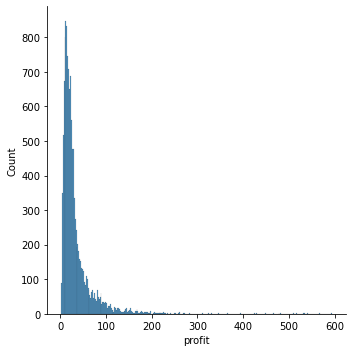

In [352]:
sns.displot(Male)

In [354]:
Male.skew()

5.000617433542463

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profit'>

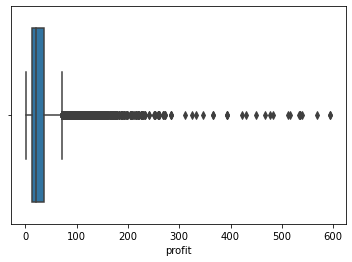

In [357]:
sns.boxplot(Male)

Skew pada Male > 1 artinya highly skewed sehingga dapat kita handling atau deteksi outliernya menggunakan teknik Tukey's Rule atau IQR Score 

Q1 = 25 % <br>
Q2 = 50 % <br>
Q3 = 75 % <br>

In [359]:
quartiles = np.percentile(Male, [25, 50, 75])
print(quartiles)

[12.93150025 21.43777088 36.41900008]


Dikarenakan bentuk kurva bukan distribusi normal maka perlu dilakukan Tukey's Rule untuk mendeteksi Outlier menggunakan Extreme Value Analysis <b>

${q_{3}+3*IQR}$

${q_{1}-3*IQR}$

In [360]:
Q1 = 12.93150025 
Q2 = 21.43777088 
Q3 = 36.41900008
IQR = Q3-Q1
IQR

23.487499830000004

In [362]:
Maximum = Q3 + (3 * IQR)
Maximum

106.88149957000002

Batas atas atau maximum dari Interquartile Range adalah 106.88149957000002

In [363]:
Minimum = Q1 - (1.5 * IQR)
Minimum

-22.299749495000007

Batas bawah atau minimum dari Interquartile Range adalah -22.299749495000007


In [364]:
df_Male = df[df['gender']=='M'] 
Outlier_atas = df_Male[df_Male['profit']>Maximum]['profit']
Outlier_atas

16401    115.400000
16404    118.000000
16407    121.200000
16411    110.600001
16413    121.200000
            ...    
68018    119.824498
68038    129.049548
68101    107.511698
68132    153.479898
68144    112.571848
Name: profit, Length: 488, dtype: float64

In [365]:
Outlier_atas.size

488

Terdapat 488 Data Outlier di luar batas maximum

In [366]:
df.shape

(24909, 18)

In [367]:
Out_percen = 488/24909 * 100
Out_percen

1.9591312377052472

In [ ]:
Percentase Outlier adalah 1.9591312377052472 persen

In [368]:
Outlier_bawah = df_Male[df_Male['profit']<Minimum]['profit']
Outlier_bawah

Series([], Name: profit, dtype: float64)

Tidak ada Data Outlier di luar batas minimum

Filter data MRF di luar Outlier

In [370]:
df_Outlier = df_Male[
        (~df_Male['profit'].isin(Outlier_atas)) 
]
df_Outlier.head(2)

,username,age,gender,product_name,brand,category,cost,retail_price,status,created_at,shipped_at,dist_center,delivered_at,city,profit,Arrival_time,Package_time,Total_shipment
5,Christopher,29,M,Nice Shades Black One Size Canvas Military Web...,Nice Shades,Accessories,1.26900,3.00,Complete,2022-01-02,2022-01-03,Port Authority of New York/New Jersey NY/NJ,2022-01-05,NanNing,1.73100,2 days,1 days,3 days
6,Patrick,39,M,Black Silk Pre-Tied Bow Tie,UniformTux,Accessories,1.30325,3.25,Complete,2022-06-05,2022-06-05,Port Authority of New York/New Jersey NY/NJ,2022-06-08,São Luís,1.94675,3 days,0 days,3 days


In [371]:
Male_Uji= df_Outlier.profit

Hasil profit pembelian Male tanpa outlier

In [375]:
Male_Uji.describe()

count    12005.000000
mean        26.924859
std         20.882417
min          1.190020
25%         12.660120
50%         20.648000
75%         33.294451
max        106.793162
Name: profit, dtype: float64

Hasil profit pembelian Male dengan outlier

In [376]:
Male.describe()

count    12493.000000
mean        32.439959
std         37.627711
min          1.190020
25%         12.931500
50%         21.437771
75%         36.419000
max        594.404999
Name: profit, dtype: float64

### Inferential Statistic

Rata-rata profit pembelian Male adalah 32.439959, berdasarkan data tersebut dapat dibuat hipotest berupa  :
- H0 = tidak terdapat perbedaan Rata-rata profit pembelian Male_Uji dan Male awal ; rerata = 32.439959
- H1 = terdapat perbedaan Rata-rata profit pembelian Male_Uji dan Male awal ; rerata Male_Uji !=  32.439959

#### Ttest 1 sample 2 tailed

In [377]:
# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(Male_Uji, 32.439959)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 4.871922790111356e-178
t-statistics: -28.93701369172261


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


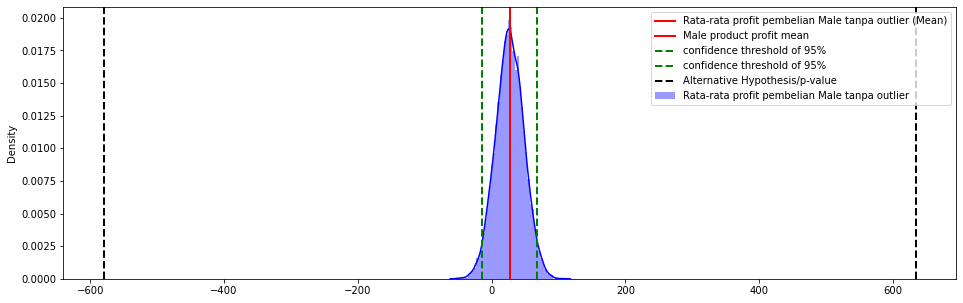

In [378]:
pop = np.random.normal(Male_Uji.mean(), Male_Uji.std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, Male_Uji.mean(), Male_Uji.std())

# memvisualisasikan simulasi pdf
plt.figure(figsize=(16,5))
sns.distplot(pop, label='Rata-rata profit pembelian Male tanpa outlier', color='blue')
plt.axvline(Male_Uji.mean(), color='red', linewidth=2, label='Rata-rata profit pembelian Male tanpa outlier (Mean)')

# Visualisasikan garis rata2 dari data yang sudah disiapkan di awal
# mean
plt.axvline(Male_Uji.mean(), color='red', linewidth=2, label='Male product profit mean')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

P Value = 4.871922790111356e-178 atau < 0.05 dan berada di area tolak H0

Kesimpulannya adalah karena tolak H0, terdapat perbedaan Rata-rata profit pembelian Male_Uji dan Male awal dan berbeda secara signifikan

## Conclusions, Assumptions, Overall Analysis

1. Penjualan Thelook_ecommerce menguntungkan dengan nilai profit total sebesar 549021.8873376349 dan nilai maximum profitnya berada di 594.404999.
2. Category produk yang paling banyak pembeliannya adalah Intimates sebanyak 1315 dan paling sedikit adalah Clothing Sets sebanya 30
3. Pembelian terbanyak terjadi di Shanghai sebanyak 427 dan yang sedikit sebanyak 1 salah satunya adalah di Brakel
4. Produk paling banyak dibeli oleh gender Female, yaitu sebanyak 8944 dari 17855 atau 50.092411089330724 persen
5. Rata-rata proses pengiriman dari packaging hingga sampai ke user atau buyer adalah selama 2 days 22:18:42, pengiriman terlama adalah 8 days, namun ada anomali data pada pengiriman tercepat yaitu selama -4 days, sehingga perlu di analisa lebih dalam
6. Total loss profit
- error total_shipment sebesar 107648.5895662898
- returned product sebesar 220115.99543775007
- cancelled product sebesar 338270.21204926725
sehingga Total loss profitnya sebesar 666034.7970533071
7. Central tendency Male,
- mean = 32.43995885290037
- median = 21.437770879670534
- mode = 16.595851 dan 15.693720

Central tendency Female,
- mean = 29.306175646432298
- median = 18.976250347513698
- mode = 3.620820 dan 43.212000    

8. Rata-rata profit pembelian Male adalah 32.439959, berdasarkan data tersebut dapat dibuat hipotest berupa  :
- H0 = tidak terdapat perbedaan Rata-rata profit pembelian Male_Uji dan Male awal ; rerata = 32.439959
- H1 = terdapat perbedaan Rata-rata profit pembelian Male_Uji dan Male awal ; rerata Male_Uji !=  32.439959
setelah dilakukan perhitungan,
P Value = 4.871922790111356e-178 atau < 0.05 dan berada di area tolak H0
Kesimpulannya adalah karena tolak H0, terdapat perbedaan Rata-rata profit pembelian Male_Uji dan Male awal dan berbeda secara signifikan




Secara statistik outlier sebesar 1.9591312377052472 persen merupakan data di luar distribusi, namun bisa dijadikan target penjualan, bagaimana outlier tersebut menjadi data rata-rata profit penjualan di masa depan dengan memperbaiki sistem distribusi yang masih terdapat error sehingga loss profit bisa diminimalisir atau dihilangkan.